In [1]:
# Import required libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_profiling
from lifelines import KaplanMeierFitter

In [2]:
mean_metylation_data = pd.read_excel("data/Mean Methylation Univariate freash.xlsx", sheet_name="new 69 ")

In [3]:
mean_metylation_data

,ProbeID,cg01638792,cg01674147,cg02001060,cg02082342,cg02096790,cg02187259,cg02643667,cg02719634,cg02733351,...,cg27027375,cg27051686,cg27235315,cg27505627,cg27658026,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time
0,TCGA_2J_AAB1_01A_11D_A40Y_05,0.491201,0.173590,0.476329,0.325257,0.356564,0.817012,0.507505,0.542351,0.505785,...,0.248667,0.590689,0.409178,0.488546,0.247559,TCGA-2J-AAB1,1,66.0,NaN,66
1,TCGA_2J_AAB4_01A_12D_A40Y_05,0.625347,0.463946,0.449275,0.493122,0.601827,0.785328,0.575859,0.660719,0.652800,...,0.485489,0.641507,0.680405,0.639395,0.452439,TCGA-2J-AAB4,0,NaN,729.0,729
2,TCGA_2J_AAB6_01A_11D_A40Y_05,0.444757,0.268788,0.272392,0.320920,0.497182,0.340112,0.542136,0.614963,0.358583,...,0.287650,0.673231,0.417203,0.427119,0.446324,TCGA-2J-AAB6,1,293.0,NaN,293
3,TCGA_2J_AAB8_01A_12D_A40Y_05,0.728301,0.497461,0.448643,0.529637,0.569715,0.340261,0.627868,0.622662,0.687478,...,0.486967,0.671563,0.644702,0.791485,0.431043,TCGA-2J-AAB8,0,NaN,80.0,80
4,TCGA_2J_AAB9_01A_11D_A40Y_05,0.839197,0.586325,0.541285,0.663962,0.710678,0.655818,0.799749,0.841315,0.701910,...,0.615622,0.697906,0.800287,0.932458,0.586978,TCGA-2J-AAB9,1,627.0,NaN,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,0.872174,0.490214,0.648229,0.634170,0.677142,0.798167,0.828484,0.756274,0.846096,...,0.611557,0.792761,0.822199,0.824954,0.465845,TCGA-XN-A8T5,0,NaN,720.0,720
178,TCGA_YB_A89D_01A_12D_A368_05,0.599280,0.255132,0.416217,0.395956,0.417851,0.527200,0.633223,0.521398,0.513998,...,0.372310,0.566002,0.512828,0.603518,0.366357,TCGA-YB-A89D,0,NaN,350.0,350
179,TCGA_YH_A8SY_01A_11D_A378_05,0.765884,0.314796,0.404371,0.402722,0.631520,0.163757,0.656591,0.668806,0.649224,...,0.509813,0.671421,0.450974,0.690090,0.396840,TCGA-YH-A8SY,0,NaN,388.0,388
180,TCGA_YY_A8LH_01A_11D_A368_05,0.290952,0.122630,0.345974,0.197389,0.304228,0.439063,0.255875,0.282486,0.253300,...,0.210282,0.308241,0.521600,0.327986,0.216992,TCGA-YY-A8LH,0,NaN,2016.0,2016


In [4]:
mean_metylation_data.dtypes

ProbeID                       object
cg01638792                   float64
cg01674147                   float64
cg02001060                   float64
cg02082342                   float64
                              ...   
tcga_participant_barcode      object
CLI_vital_status               int64
CLI_days_to_death            float64
CLI_days_to_last_followup    float64
CLI_Time                       int64
Length: 140, dtype: object

In [5]:
mean_metylation_data.isnull().sum()

ProbeID                       0
cg01638792                    0
cg01674147                    0
cg02001060                    0
cg02082342                    0
                             ..
tcga_participant_barcode      0
CLI_vital_status              0
CLI_days_to_death            83
CLI_days_to_last_followup    99
CLI_Time                      0
Length: 140, dtype: int64

One-way to deal with missing values is to remove it entirely, but this will reduce the sample when you have already a small sample size. Next method would be to impute missing values with mean/median or with a particular value.

Instead of deleting missing observations here, IWe have imputed them (i.e.,CLI_days_to_death and CLI_days_to_last_followup) with the mean of the column.

In [6]:
mean_metylation_data["CLI_days_to_death"].fillna(mean_metylation_data["CLI_days_to_death"].mean(), inplace = True)
mean_metylation_data["CLI_days_to_last_followup"].fillna(mean_metylation_data["CLI_days_to_last_followup"].mean(), inplace = True)

In [7]:
mean_metylation_data.head()
# pandas_profiling.ProfileReport(mtdata)

,ProbeID,cg01638792,cg01674147,cg02001060,cg02082342,cg02096790,cg02187259,cg02643667,cg02719634,cg02733351,...,cg27027375,cg27051686,cg27235315,cg27505627,cg27658026,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time
0,TCGA_2J_AAB1_01A_11D_A40Y_05,0.491201,0.173590,0.476329,0.325257,0.356564,0.817012,0.507505,0.542351,0.505785,...,0.248667,0.590689,0.409178,0.488546,0.247559,TCGA-2J-AAB1,1,66.000000,697.084337,66
1,TCGA_2J_AAB4_01A_12D_A40Y_05,0.625347,0.463946,0.449275,0.493122,0.601827,0.785328,0.575859,0.660719,0.652800,...,0.485489,0.641507,0.680405,0.639395,0.452439,TCGA-2J-AAB4,0,462.585859,729.000000,729
2,TCGA_2J_AAB6_01A_11D_A40Y_05,0.444757,0.268788,0.272392,0.320920,0.497182,0.340112,0.542136,0.614963,0.358583,...,0.287650,0.673231,0.417203,0.427119,0.446324,TCGA-2J-AAB6,1,293.000000,697.084337,293
3,TCGA_2J_AAB8_01A_12D_A40Y_05,0.728301,0.497461,0.448643,0.529637,0.569715,0.340261,0.627868,0.622662,0.687478,...,0.486967,0.671563,0.644702,0.791485,0.431043,TCGA-2J-AAB8,0,462.585859,80.000000,80
4,TCGA_2J_AAB9_01A_11D_A40Y_05,0.839197,0.586325,0.541285,0.663962,0.710678,0.655818,0.799749,0.841315,0.701910,...,0.615622,0.697906,0.800287,0.932458,0.586978,TCGA-2J-AAB9,1,627.000000,697.084337,627



**Data distribution**

Prior to starting the model fitting process, save the time variable in *T* and the event/status variable in *E*.

To gain a general sense of the distribution, let's plot a histogram of the time variable. According to the histogram, the time variable almost exhibits a Weibull or Log-normal distribution. During the phase of AFT model estimation, we shall verify that.

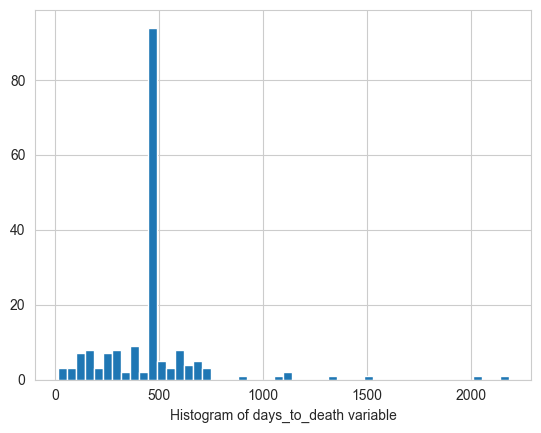

In [8]:
T = mean_metylation_data["CLI_days_to_death"]
E = mean_metylation_data["CLI_vital_status"]
plt.hist(T, bins = 50)
plt.xlabel("Histogram of days_to_death variable")
plt.show()


### Kaplan-Maier Curve Estimation (Non-Parametric)
To start with survival analysis, the first step is to plot a survival curve of the overall data. It can be done by generating a Kaplan-Maier curve.

The Kaplan-Meier approach, also called the product-limit approach, is a popular approach which re-estimates the survival probability each time an event occurs. It is a non-parametric method, means it does not assume the distribution of the outcome variable (i.e., time).


In [9]:
kmf_s = KaplanMeierFitter()

In [10]:
kmf_s.fit(mean_metylation_data["CLI_days_to_death"], mean_metylation_data["CLI_vital_status"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 182 total observations, 83 right-censored observations>

In [11]:
#predicting the survival probality


In [12]:
kmf_s.survival_function_

,KM_estimate
timeline,
0.0,1.000000
12.0,0.994505
31.0,0.989011
41.0,0.983516
61.0,0.978022
...,...
1130.0,0.062515
1332.0,0.046886
1502.0,0.031258


<Axes: xlabel='timeline'>

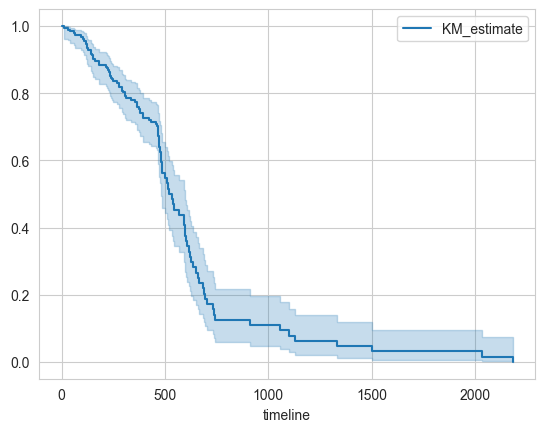

In [13]:
kmf_s.plot_survival_function()

KM Plot with 95% CI
The curve shows how the likelihood of survival changes throughout the time horizon. The likelihood that a patent will survive over time decreases.

Using the `.survival_function_.plot()` method, we can generate the same plot without the 95% confidence interval.

Text(0.5, 1.0, 'Survival function')

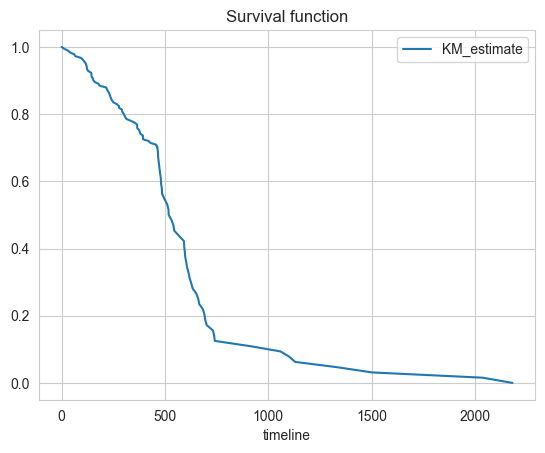

In [14]:
kmf_s.survival_function_.plot()
plt.title('Survival function')

Moreover, a failure curve can be drawn. It is the exact opposite of survival, i.e., the likelihood of failure or death over time.

<Axes: xlabel='timeline'>

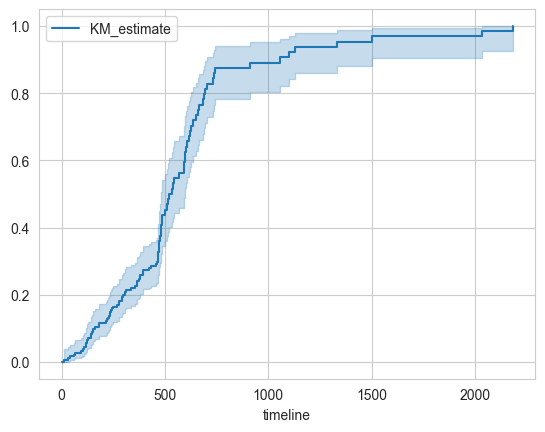

In [15]:
kmf_s.plot_cumulative_density()

Median Survival Time and Confidence Intervals

The next step is to estimate the median survival time and 95% confidence intervals. This can be done using the .median_survival_time_ and median_survival_times( ). Here, the median survival time is 532 days, which indicates that 50% of the sample live 532 days and 50% dies within this time. The 95% CI lower limit is 481 days, while the upper limit is 596 days.

In [16]:
from lifelines.utils import median_survival_times
median_ = kmf_s.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf_s.confidence_interval_)
print(median_)
print(median_confidence_interval_)

532.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   481.0                   596.0


In [17]:
mean_metylation_data.drop(['ProbeID', 'tcga_participant_barcode','CLI_days_to_last_followup'], axis=1)
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi_dataset = mean_metylation_data.drop(['ProbeID', 'tcga_participant_barcode','CLI_days_to_last_followup'], axis=1)
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='CLI_days_to_death', event_col='CLI_vital_status')
cph.print_summary() 

D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 182 total observations, 83 right-censored observations>
             duration col = 'CLI_days_to_death'
                event col = 'CLI_vital_status'
      baseline estimation = breslow
   number of observations = 182
number of events observed = 99
   partial log-likelihood = -366.71
         time fit was run = 2024-01-17 16:04:26 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
cg01638792   0.08       1.09       3.38            -6.54             6.70                 0.00               814.86
cg01674147   0.45       1.57       6.84           -12.96            13.86                 0.00             1.05e+06
cg02001060   1.38       3.97       6.98           -12.30            15.06                 0.00             3.47e+06
cg02082342   1.25       3.49       5.30            -9.15            11.65                 0.00             1.14e+05
cg02096790  -1.41       0.24       6.25           -13.65            10.83                 0.00             50536.21
cg02187259   1.23       3.41       4.11            -6.83             9.29                 0.00             10801.26
cg02643667   3.74      41.99       7.98           -11.90            19.37                 0.00             2.59e+08
cg02719634  -0.90       0.40       6.58           -13.80            11.99                 0.00             1.62e+05
cg02733351   0.17       1.18       5.80           -11.21            11.54                 0.00             1.03e+05
cg02749784   0.85       2.35       5.71           -10.33            12.04                 0.00             1.69e+05
cg02965295   0.56       1.75       4.11            -7.50             8.62                 0.00              5520.04
cg03065165   0.44       1.56       4.90            -9.16            10.04                 0.00             22973.69
cg03531754   0.71       2.03       3.75            -6.63             8.05                 0.00              3125.67
cg03532013   0.43       1.53       2.72            -4.90             5.75                 0.01               314.77
cg03607648  -0.13       0.88       3.67            -7.33             7.08                 0.00              1182.24
cg04804772  -0.55       0.58       5.04           -10.43             9.32                 0.00             11165.24
cg04956949  -1.67       0.19       8.49           -18.31            14.98                 0.00             3.19e+06
cg04968426   0.11       1.12       3.67            -7.09             7.31                 0.00              1495.09
cg05209483   1.62       5.08       6.23           -10.59            13.84                 0.00             1.02e+06
cg05626664   1.10       3.00       3.78            -6.30             8.50                 0.00              4922.64
cg05655953   1.67       5.32       3.12            -4.45             7.79                 0.01              2418.21
cg06048910   5.23     187.46      12.72           -19.70            30.17                 0.00             1.27e+13
cg06099014  -3.35       0.03      10.07           -23.09            16.38                 0.00             1.30e+07
cg06196689  -1.75       0.17       4.44           -10.46             6.95                 0.00              1045.99
cg06495763  -6.74       0.00      11.98           -30.22            16.75                 0.00             1.88e+07
cg06578276  -5.46       0.00      11.01           -27.04            16.11                 0.00             9.90e+06
cg06601993   0.33       1.39       2.80            -5.15             5.81                 0.01               334.05
cg06974428  -1.15       0.32       5.02           -11.00             8.70                 0.00              6008.29
cg07010146   2.02       7.56       9.70           -17.00            21.04                 0.00             1.38e+09
cg07010486  -0.06       0

In [18]:
cph

<lifelines.CoxPHFitter: fitted with 182 total observations, 83 right-censored observations>

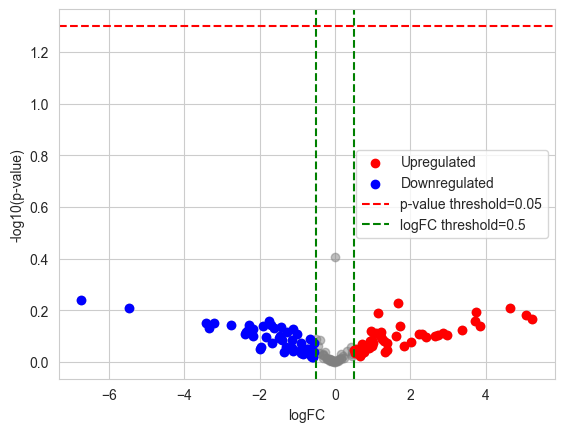

In [19]:
cph_data = cph.summary
lfc_thr = 0.5
pv_thr = 0.05

# Create a volcano plot
plt.scatter(cph_data['coef'], -1 * np.log10(cph_data['p']), c='gray', alpha=0.5)
plt.scatter(cph_data[cph_data['coef'] > lfc_thr]['coef'], -1 * np.log10(cph_data[cph_data['coef'] > lfc_thr]['p']), c='red', label='Upregulated')
plt.scatter(cph_data[cph_data['coef'] < -lfc_thr]['coef'], -1 * np.log10(cph_data[cph_data['coef'] < -lfc_thr]['p']), c='blue', label='Downregulated')

plt.axhline(-np.log10(pv_thr), color='r', linestyle='--', label=f'p-value threshold={pv_thr}')
plt.axvline(lfc_thr, color='g', linestyle='--', label=f'logFC threshold={lfc_thr}')
plt.axvline(-lfc_thr, color='g', linestyle='--')

plt.xlabel('logFC')
plt.ylabel('-log10(p-value)')
plt.legend()
plt.show()

**Volcano plot:** Identification of differentially expressed genes and differentially methylated sites. Volcano plot

<Axes: xlabel='log(HR) (95% CI)'>

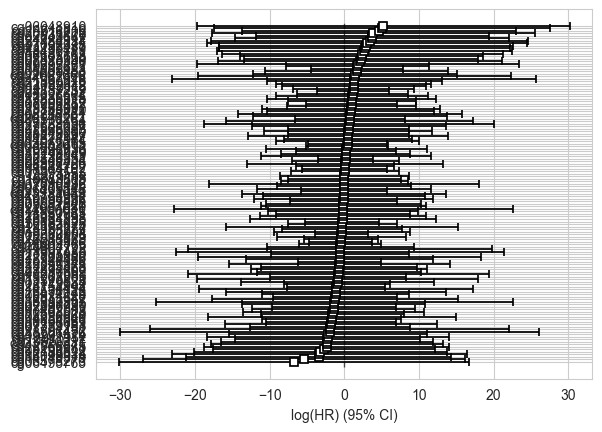

In [20]:
cph.plot()

<Axes: >

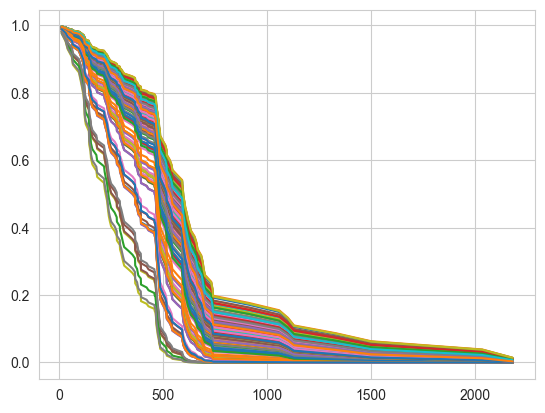

In [21]:
cph.predict_survival_function(mean_metylation_data).plot(legend=None)


In [22]:
log_lambda = cph.params_['cg13295878']
log_lambda

-0.6999824428424745

In [23]:
cph_data = cph.summary.query('p < 0.05')
cph_data

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,


We explore the *Cox's proportional* hazards model's variable selection issue and suggest a unified model selection and estimate method with the desired theoretical features and ease of computation. The adaptive Lasso estimator is produced by the novel approach, which is based on a penalised log partial likelihood with the adaptively weighted $L_1$ penalty on regression coefficients. The approach uses varying penalties for various coefficients. Insignificant variables are subject to greater penalties than important ones, which results in a tendency for important variables to be kept in the selection process while unimportant variables are more likely to be eliminated. Test is done on the estimator's theoretical characteristics, including consistency and rate of convergence.

**Adaptive Lasso estimator** is the solution of

$$\underbrace{\mathrm{min}}_{\beta } \left\{-\frac{1}{n}l_n\left(\beta \right)+\lambda \sum^d_{j=1}{\left|{\beta }_j\right|{\tau }_j}\right\}     (1)$$ 



where the positive weights $\tau = (\tau_{1}, \tau_{2}, ....,\tau_{d})^{T}$ are determined based on data in an adaptive manner. For the solution to be optimal, the values selected for the $\tau_{j}$'s are essential. Utilizing ${\tau }_j=1/\left|\tilde{{\beta }_j}\right|$ (where $\tilde{\beta}$ = $(\beta_{1},..., \beta_{d})^{T}$ is the maximizer of the log partial likelihood $l_{n}(\beta)$) is our suggestion. As consistent estimators, their values accurately reflect the relative weights of the covariates (*Tsiatis, 1981; Andersen & Gill, 1982*). Therefore, we concentrate on the issue.
$$\underbrace{\mathrm{min}}_{\beta } \left\{-\frac{1}{n}l_n\left(\beta \right)+\lambda \sum^d_{j=1}{\left|{\beta }_j\right|/\left|\tilde{{\beta }_j}\right|}\right\} (2)$$

Any reliable estimates of ${\beta}$ may be utilised; ${\tilde{\beta}}$ is merely a practical option. In the wavelet literature (*Donoho & Johnstone, 1998; Antoniadis & Fan, 2001*), the $L_{0}$ penalty $\sum_{j=1}^{d}{I(\tilde{\beta_{j}}\not=0)}$  also known as the **entropy penalty**, is closely connected to the adaptive penalty factor in equation (2). The term ${\left|{\beta }_j\right|/\left|\tilde{{\beta }_j}\right|}$ converges to ${I(\tilde{\beta_{j}}\not=0)}$with probability as $n \to \infty$ because of the consistency of $\tilde{\beta_{j}}$. As a result, in an asymptotic sense, the adaptive Lasso technique can be seen as an automatic implementation of best-subset selection.

In [24]:
import asgl

In [25]:
number_observations = 182
number_variables = 69
number_significant_variables = 0

In [26]:
x_data = mean_metylation_data[mean_metylation_data.columns[1:134]]
x_data

y_data = mean_metylation_data["CLI_vital_status"]
y_data


0      1
1      0
2      1
3      0
4      1
      ..
177    0
178    0
179    0
180    0
181    0
Name: CLI_vital_status, Length: 182, dtype: int64

In [27]:
x_data

,cg01638792,cg01674147,cg02001060,cg02082342,cg02096790,cg02187259,cg02643667,cg02719634,cg02733351,cg02749784,...,cg25198049,cg25255988,cg25981998,cg26109145,cg26474043,cg26683025,cg27027375,cg27051686,cg27235315,cg27505627
0,0.491201,0.173590,0.476329,0.325257,0.356564,0.817012,0.507505,0.542351,0.505785,0.496513,...,0.689609,0.344437,0.091317,0.484214,0.210223,0.444377,0.248667,0.590689,0.409178,0.488546
1,0.625347,0.463946,0.449275,0.493122,0.601827,0.785328,0.575859,0.660719,0.652800,0.581396,...,0.611788,0.527650,0.156055,0.597551,0.335716,0.573860,0.485489,0.641507,0.680405,0.639395
2,0.444757,0.268788,0.272392,0.320920,0.497182,0.340112,0.542136,0.614963,0.358583,0.637912,...,0.058929,0.471942,0.076233,0.559219,0.288741,0.297551,0.287650,0.673231,0.417203,0.427119
3,0.728301,0.497461,0.448643,0.529637,0.569715,0.340261,0.627868,0.622662,0.687478,0.732183,...,0.193932,0.546630,0.097384,0.596805,0.461948,0.696999,0.486967,0.671563,0.644702,0.791485
4,0.839197,0.586325,0.541285,0.663962,0.710678,0.655818,0.799749,0.841315,0.701910,0.905278,...,0.566030,0.614838,0.244862,0.722641,0.478596,0.910771,0.615622,0.697906,0.800287,0.932458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.872174,0.490214,0.648229,0.634170,0.677142,0.798167,0.828484,0.756274,0.846096,0.664476,...,0.576623,0.647228,0.363342,0.714459,0.583392,0.696016,0.611557,0.792761,0.822199,0.824954
178,0.599280,0.255132,0.416217,0.395956,0.417851,0.527200,0.633223,0.521398,0.513998,0.500374,...,0.217515,0.496957,0.137874,0.582371,0.350597,0.900243,0.372310,0.566002,0.512828,0.603518
179,0.765884,0.314796,0.404371,0.402722,0.631520,0.163757,0.656591,0.668806,0.649224,0.720820,...,0.035875,0.637073,0.080957,0.592828,0.306379,0.514424,0.509813,0.671421,0.450974,0.690090
180,0.290952,0.122630,0.345974,0.197389,0.304228,0.439063,0.255875,0.282486,0.253300,0.208270,...,0.148806,0.324226,0.063217,0.582171,0.205719,0.382948,0.210282,0.308241,0.521600,0.327986


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size=0.2, random_state=42)
feature_names = list(x_data.columns.values) #adjust accordingly
target_names = ["CLI_vital_status"]
# LASSO Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(x_train, y_train)

# Adaptive LASSO Regression
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train, y_train)

# Implement Adaptive LASSO manually
alpha_adaptive_lasso = lasso_cv.alpha_
gamma = 1.0  # You can adjust the gamma parameter
# Predictions
lasso_predictions = lasso_model.predict(x_test)


# Apply threshold for classification task
lasso_predictions_binary = (lasso_predictions >= 0.5).astype(int)

# Evaluate the models
lasso_accuracy = accuracy_score(y_test, lasso_predictions_binary)


print(f"LASSO Accuracy: {lasso_accuracy}")


# Display selected features
lasso_selected_features = [feature_names[i] for i, coef in enumerate(lasso_model.coef_) if coef != 0]

print(lasso_selected_features)


D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.426e-03, tolerance: 2.878e-03
  model = cd_fast.enet_coordinate_descent(
D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e-03, tolerance: 2.878e-03
  model = cd_fast.enet_coordinate_descent(
D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

LASSO Accuracy: 0.5675675675675675
['cg02965295', 'cg09060908', 'cg20340346', 'cg26683025']


D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e-01, tolerance: 2.897e-03
  model = cd_fast.enet_coordinate_descent(
D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e-01, tolerance: 2.897e-03
  model = cd_fast.enet_coordinate_descent(


In [29]:
from sklearn.preprocessing import StandardScaler
def Adaptive_LASSO(X_train,y_train,max_iterations = 1000,lasso_iterations = 10, alpha = 0.1, tol = 0.001, max_error_up = 5, title = ''):
    
    # set checks
    higher  = float('inf')
    lower   = 0
    
    # set lists
    coefficients_list = []
    total_effects_list = []
    iterations_list   = []
    
    # set variables
    X_train  = X_train
    y_train  = y_train
    
    # set constants
    alpha    = alpha
    tol      = tol
    max_iter = max_iterations
    n_lasso_iterations = lasso_iterations
    
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

    n_samples, n_features = X_train.shape
    p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y_train - np.dot(X_train, w)) ** 2) \
                      + alpha * np.sum(g(w))

    weights = np.ones(n_features)

    X_w = X_train / weights[np.newaxis, :]
    X_w  = np.nan_to_num(X_w)
    X_w  = np.round(X_w,decimals = 3)

    y_train    = np.nan_to_num(y_train)

    adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)

    adaptive_lasso.fit(X_w, y_train)

    for k in range(n_lasso_iterations):
        X_w = X_train / weights[np.newaxis, :]
        adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)
        adaptive_lasso.fit(X_w, y_train)
        coef_ = adaptive_lasso.coef_ / weights
        weights = gprime(coef_)
        
        # Calculate Adaptive Total Effect (ATE)
        total_effect = np.abs(coef_)
        total_effects_list.append(total_effect)
        
        print ('Iteration #',k+1,':   ',p_obj(coef_))  # should go down
        
        iterations_list.append(k)
        coefficients_list.append(p_obj(coef_))
        
    print (np.mean((adaptive_lasso.coef_ != 0.0) == (coef_ != 0.0)))   
    
    coef = pd.Series(adaptive_lasso.coef_, index = X_train.columns)
    ate = adaptive_lasso.coef_ * (1 + alpha * np.abs(weights) ** -1)
    print('=============================================================================')
    print("Adaptive LASSO picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
    print('=============================================================================')

    plt.rcParams["figure.figsize"] = (18,8)

    # subplot of the predicted vs. actual

    plt.plot(iterations_list,coefficients_list,color = 'orange')
    plt.scatter(iterations_list,coefficients_list,color = 'green')
    plt.title('Iterations vs. p_obj(coef_)')
    plt.show()

    # plot of the coefficients'

    imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
    imp_coef.plot(kind = "barh", color = 'green',  fontsize=14)
    plt.title("Top and Botton 10 Coefficients Selected by the Adaptive LASSO Model", fontsize = 14)
    plt.show()
    return adaptive_lasso, coefficients_list, ate 

D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e-02, tolerance: 7.200e-03
  model = cd_fast.enet_coordinate_descent(


Iteration # 1 :    0.13066567875050963
Iteration # 2 :    0.12560460517928318
Iteration # 3 :    0.12467136888523848
Iteration # 4 :    0.12464052412132096


D:\research-work-2023\pancreatic_cancer\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.217e-02, tolerance: 7.200e-03
  model = cd_fast.enet_coordinate_descent(


Iteration # 5 :    0.12462739069622006
Iteration # 6 :    0.12462159309390183
Iteration # 7 :    0.12461921641905523
Iteration # 8 :    0.12461834247272838
Iteration # 9 :    0.12461805553003853
Iteration # 10 :    0.12461797392313183
1.0
Adaptive LASSO picked 8 variables and eliminated the other 125 variables.


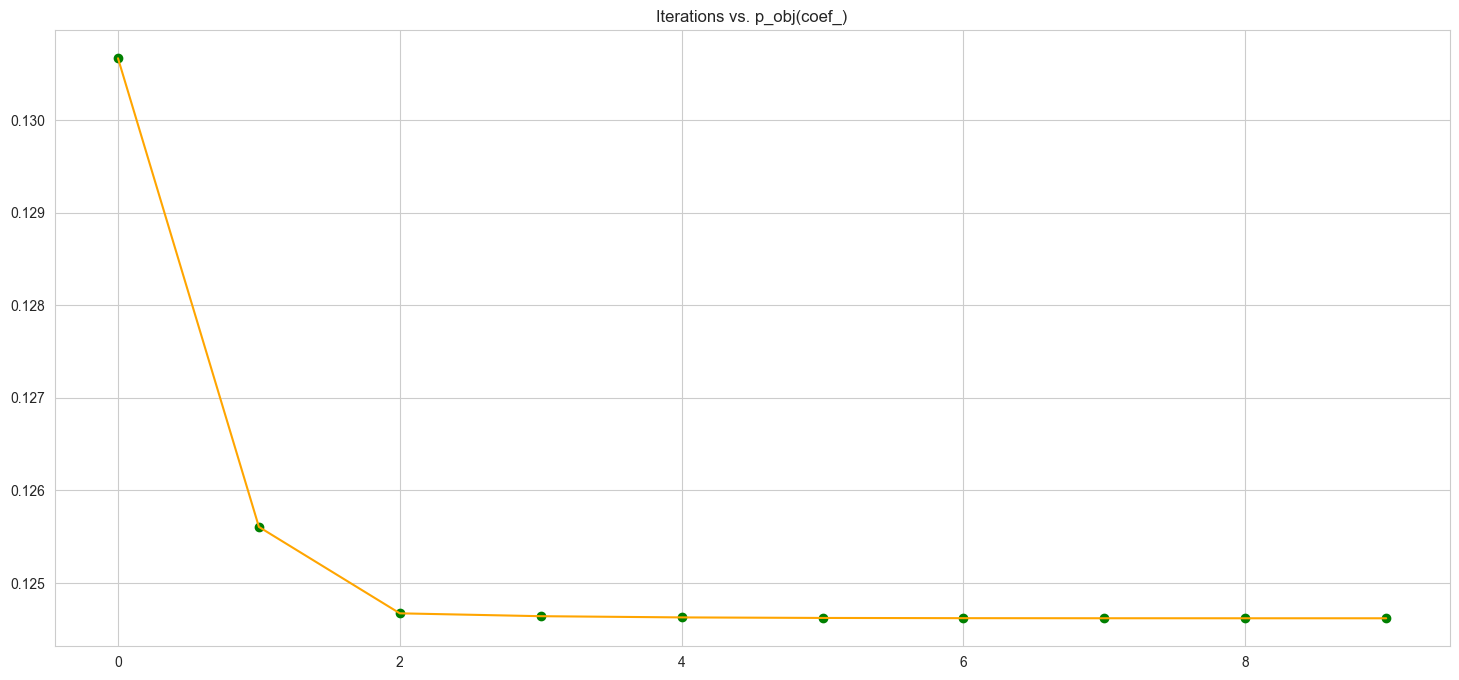

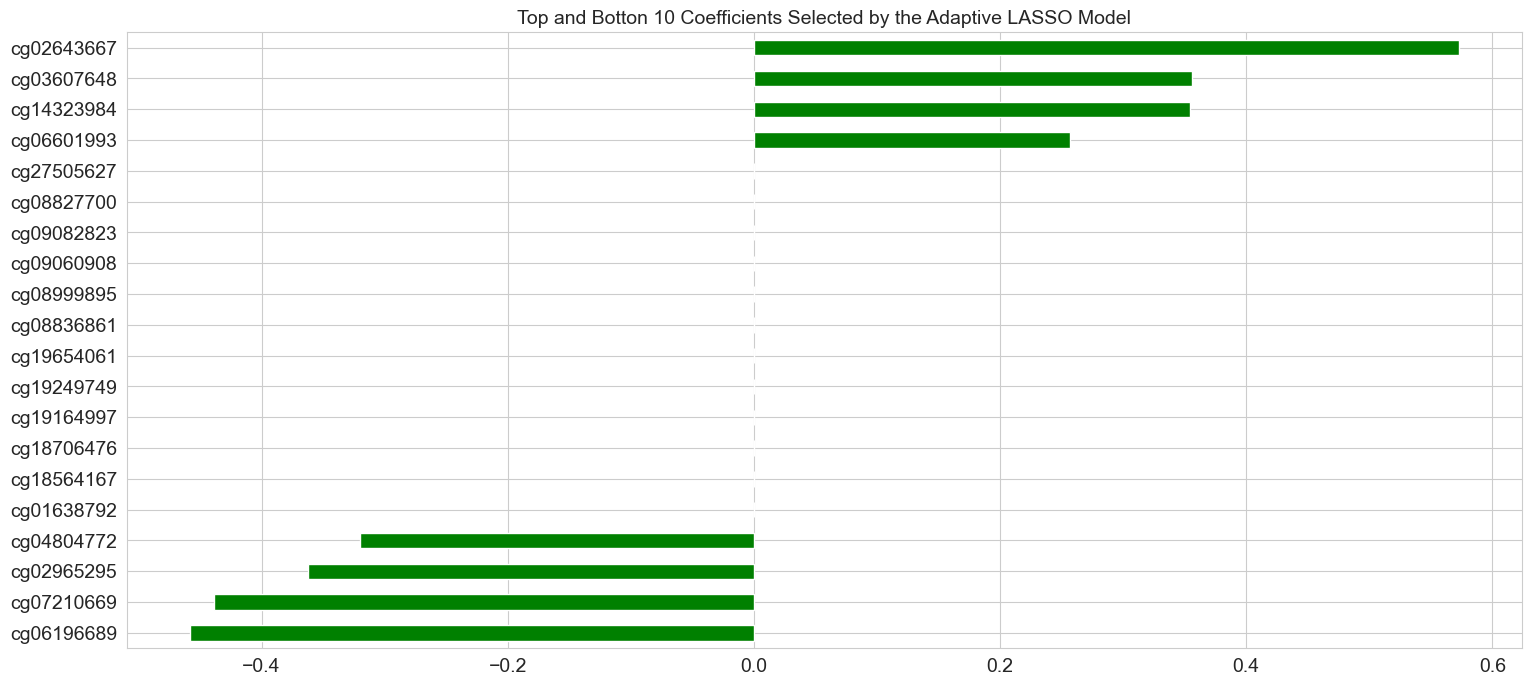

Lasso(alpha=0.003944440591062631, fit_intercept=False)

In [30]:
alpha_adaptive_lasso = lasso_cv.alpha_

model, coefficients_list, total_effects = Adaptive_LASSO(x_train, y_train, max_iterations = 1000,
                       lasso_iterations = 10, 
                       alpha = lasso_cv.alpha_, 
                       tol = 0.001, 
                       max_error_up = 5, 
                       title = '')
# lasso_predictions = lasso_model.predict(x_test)
# 
# 
# # Apply threshold for classification task
# lasso_predictions_binary = (lasso_predictions >= 0.5).astype(int)
# 
# # Evaluate the models
# lasso_accuracy = accuracy_score(y_test, lasso_predictions_binary)
# 
# 
# print(f"LASSO Accuracy: {lasso_accuracy}")
# 
# 
# # Display selected features
# lasso_selected_features = [feature_names[i] for i, coef in enumerate(lasso_model.coef_) if coef != 0]
# 
# print(lasso_selected_features)
model

In [31]:
coef = pd.Series(model.coef_, index = x_train.columns)
coef = pd.DataFrame(coef).reset_index()
coef_list = coef.loc[coef[0]!= 0.0]['index'].to_list()
new_X_train = x_train[coef_list]
coef_list

['cg02643667',
 'cg02965295',
 'cg03607648',
 'cg04804772',
 'cg06196689',
 'cg06601993',
 'cg07210669',
 'cg14323984']

### ATE

In the context of Adaptive Lasso (AL), **ATE** usually refers to the **Adaptive Total Effect.** The Adaptive Lasso is a modification of the Lasso regularization method that introduces adaptive weights on the penalty terms for each coefficient during model training. The idea is to adaptively penalize or shrink the less important coefficients more than the important ones, allowing for better variable selection.

The *Total Effect*, in this context, refers to the overall impact of a predictor variable on the response variable. The Adaptive Total Effect specifically considers the adaptively penalized coefficients when assessing the impact of each predictor.

The formula for the Adaptive Total Effect in the context of Adaptive Lasso can be expressed as:

$ ATE_j = \hat{\beta}_j \cdot (1 + \lambda \cdot |\mathbf{w}_j|^{-\alpha}) $

Where:

1. $\hat{\beta}_j$ is the estimated coefficient for the *j*-th predictor.
2.  $\lambda$ is the regularization parameter (similar to the regularization strength in standard Lasso).
 3. ${w}_j$ is the adaptive weight for the *j*-th predictor, and $\alpha$ controls the degree of adaptation.


The adaptive weight ${w}_j$ is usually computed based on the absolute values of the estimated coefficients from the Lasso model, and $\alpha$ determines how strong the adaptive effect is. When $\alpha$ is set to 0, the adaptive effect disappears, and the Adaptive Lasso becomes equivalent to the standard Lasso.

In summary, the Adaptive Total Effect in the context of Adaptive Lasso takes into account the adaptively penalized coefficients when assessing the impact of each predictor variable on the response variable. It's a way to incorporate variable importance into the regularization process.


In [32]:
total_effects

array([ 0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.57764704,  0.        ,  0.        , -0.        ,
       -0.36410181,  0.        , -0.        ,  0.        ,  0.35804093,
       -0.32163324, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.4611718 ,  0.        ,
       -0.        ,  0.25761481, -0.        ,  0.        ,  0.        ,
        0.        , -0.44209244,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.  

In [33]:
non_zero_values_ate = total_effects[np.nonzero(total_effects)]
non_zero_values_ate

array([ 0.57764704, -0.36410181,  0.35804093, -0.32163324, -0.4611718 ,
        0.25761481, -0.44209244,  0.35600248])

In [34]:
def risk_score():
    risk_score = list()
    for i in range(0, len(mean_metylation_data)):
        risk_score.append(non_zero_values_ate[0]*mean_metylation_data.iloc[i]['cg02643667']+non_zero_values_ate[1]*mean_metylation_data.iloc[i]['cg02965295']+non_zero_values_ate[2]*mean_metylation_data.iloc[i]['cg03607648']+non_zero_values_ate[3]*mean_metylation_data.iloc[i]['cg04804772']+non_zero_values_ate[4]*mean_metylation_data.iloc[i]['cg06196689']+non_zero_values_ate[5]*mean_metylation_data.iloc[i]['cg06601993']+non_zero_values_ate[6]*mean_metylation_data.iloc[i]['cg07210669'] + non_zero_values_ate[6]*mean_metylation_data.iloc[i]['cg09082823']);
    return np.array(risk_score)

risk_score()

array([ 0.04935578, -0.21385117,  0.07390485, -0.38919894, -0.24572497,
       -0.24285237, -0.22830477, -0.30098163, -0.02547082,  0.19969911,
       -0.23351486, -0.02421235, -0.42938922, -0.27594789, -0.41024695,
       -0.04119248, -0.42755507,  0.0532156 , -0.0988403 , -0.21275976,
        0.02545968, -0.06237617, -0.30370221, -0.29534053, -0.30314236,
       -0.2026333 , -0.07304512, -0.15759556,  0.10886538, -0.39915253,
       -0.15662801, -0.39755798, -0.37877848, -0.3691001 , -0.57809563,
       -0.05757685, -0.45816293, -0.42066496, -0.18556232, -0.04885927,
       -0.35517941, -0.0808774 , -0.0489415 , -0.54038952, -0.3586928 ,
       -0.33184463, -0.22772053, -0.32785039, -0.11096301, -0.02654437,
       -0.44138348, -0.29100209,  0.14483509, -0.13952964,  0.09497974,
       -0.28722025,  0.10092281, -0.04764277, -0.39394997, -0.0826019 ,
       -0.29888937, -0.10646318, -0.06672519, -0.07295398,  0.02853505,
       -0.15020718,  0.0195806 , -0.30868   , -0.14984826, -0.14

In [35]:
rs_median= np.mean(risk_score())
rs_median

-0.19988286198114083

**Total number of patient is 182. Median of the risk score is -0.19988286198114083. Classifying the patient data in High risk and low risk group with restpect to median.**

In [36]:
HR = np.where(risk_score() > rs_median)
LR =  np.where(risk_score() < rs_median)

In [37]:
len(HR[0])

89

In [38]:
len(LR[0])

93

In [39]:
mean_metylation_data['risk_score'] =risk_score()

In [40]:
mean_metylation_data


,ProbeID,cg01638792,cg01674147,cg02001060,cg02082342,cg02096790,cg02187259,cg02643667,cg02719634,cg02733351,...,cg27051686,cg27235315,cg27505627,cg27658026,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,risk_score
0,TCGA_2J_AAB1_01A_11D_A40Y_05,0.491201,0.173590,0.476329,0.325257,0.356564,0.817012,0.507505,0.542351,0.505785,...,0.590689,0.409178,0.488546,0.247559,TCGA-2J-AAB1,1,66.000000,697.084337,66,0.049356
1,TCGA_2J_AAB4_01A_12D_A40Y_05,0.625347,0.463946,0.449275,0.493122,0.601827,0.785328,0.575859,0.660719,0.652800,...,0.641507,0.680405,0.639395,0.452439,TCGA-2J-AAB4,0,462.585859,729.000000,729,-0.213851
2,TCGA_2J_AAB6_01A_11D_A40Y_05,0.444757,0.268788,0.272392,0.320920,0.497182,0.340112,0.542136,0.614963,0.358583,...,0.673231,0.417203,0.427119,0.446324,TCGA-2J-AAB6,1,293.000000,697.084337,293,0.073905
3,TCGA_2J_AAB8_01A_12D_A40Y_05,0.728301,0.497461,0.448643,0.529637,0.569715,0.340261,0.627868,0.622662,0.687478,...,0.671563,0.644702,0.791485,0.431043,TCGA-2J-AAB8,0,462.585859,80.000000,80,-0.389199
4,TCGA_2J_AAB9_01A_11D_A40Y_05,0.839197,0.586325,0.541285,0.663962,0.710678,0.655818,0.799749,0.841315,0.701910,...,0.697906,0.800287,0.932458,0.586978,TCGA-2J-AAB9,1,627.000000,697.084337,627,-0.245725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,0.872174,0.490214,0.648229,0.634170,0.677142,0.798167,0.828484,0.756274,0.846096,...,0.792761,0.822199,0.824954,0.465845,TCGA-XN-A8T5,0,462.585859,720.000000,720,-0.385415
178,TCGA_YB_A89D_01A_12D_A368_05,0.599280,0.255132,0.416217,0.395956,0.417851,0.527200,0.633223,0.521398,0.513998,...,0.566002,0.512828,0.603518,0.366357,TCGA-YB-A89D,0,462.585859,350.000000,350,-0.227243
179,TCGA_YH_A8SY_01A_11D_A378_05,0.765884,0.314796,0.404371,0.402722,0.631520,0.163757,0.656591,0.668806,0.649224,...,0.671421,0.450974,0.690090,0.396840,TCGA-YH-A8SY,0,462.585859,388.000000,388,-0.288437
180,TCGA_YY_A8LH_01A_11D_A368_05,0.290952,0.122630,0.345974,0.197389,0.304228,0.439063,0.255875,0.282486,0.253300,...,0.308241,0.521600,0.327986,0.216992,TCGA-YY-A8LH,0,462.585859,2016.000000,2016,-0.109765


In [41]:
conditions = [
    (mean_metylation_data['risk_score'] <= rs_median),
    (mean_metylation_data['risk_score'] > rs_median)
    ]

# create a list of the values we want to assign for each condition
values = [1, 2]
mean_metylation_data['risk_label'] = np.select(conditions, values)

In [42]:
mean_metylation_data

,ProbeID,cg01638792,cg01674147,cg02001060,cg02082342,cg02096790,cg02187259,cg02643667,cg02719634,cg02733351,...,cg27235315,cg27505627,cg27658026,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,risk_score,risk_label
0,TCGA_2J_AAB1_01A_11D_A40Y_05,0.491201,0.173590,0.476329,0.325257,0.356564,0.817012,0.507505,0.542351,0.505785,...,0.409178,0.488546,0.247559,TCGA-2J-AAB1,1,66.000000,697.084337,66,0.049356,2
1,TCGA_2J_AAB4_01A_12D_A40Y_05,0.625347,0.463946,0.449275,0.493122,0.601827,0.785328,0.575859,0.660719,0.652800,...,0.680405,0.639395,0.452439,TCGA-2J-AAB4,0,462.585859,729.000000,729,-0.213851,1
2,TCGA_2J_AAB6_01A_11D_A40Y_05,0.444757,0.268788,0.272392,0.320920,0.497182,0.340112,0.542136,0.614963,0.358583,...,0.417203,0.427119,0.446324,TCGA-2J-AAB6,1,293.000000,697.084337,293,0.073905,2
3,TCGA_2J_AAB8_01A_12D_A40Y_05,0.728301,0.497461,0.448643,0.529637,0.569715,0.340261,0.627868,0.622662,0.687478,...,0.644702,0.791485,0.431043,TCGA-2J-AAB8,0,462.585859,80.000000,80,-0.389199,1
4,TCGA_2J_AAB9_01A_11D_A40Y_05,0.839197,0.586325,0.541285,0.663962,0.710678,0.655818,0.799749,0.841315,0.701910,...,0.800287,0.932458,0.586978,TCGA-2J-AAB9,1,627.000000,697.084337,627,-0.245725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,0.872174,0.490214,0.648229,0.634170,0.677142,0.798167,0.828484,0.756274,0.846096,...,0.822199,0.824954,0.465845,TCGA-XN-A8T5,0,462.585859,720.000000,720,-0.385415,1
178,TCGA_YB_A89D_01A_12D_A368_05,0.599280,0.255132,0.416217,0.395956,0.417851,0.527200,0.633223,0.521398,0.513998,...,0.512828,0.603518,0.366357,TCGA-YB-A89D,0,462.585859,350.000000,350,-0.227243,1
179,TCGA_YH_A8SY_01A_11D_A378_05,0.765884,0.314796,0.404371,0.402722,0.631520,0.163757,0.656591,0.668806,0.649224,...,0.450974,0.690090,0.396840,TCGA-YH-A8SY,0,462.585859,388.000000,388,-0.288437,1
180,TCGA_YY_A8LH_01A_11D_A368_05,0.290952,0.122630,0.345974,0.197389,0.304228,0.439063,0.255875,0.282486,0.253300,...,0.521600,0.327986,0.216992,TCGA-YY-A8LH,0,462.585859,2016.000000,2016,-0.109765,2


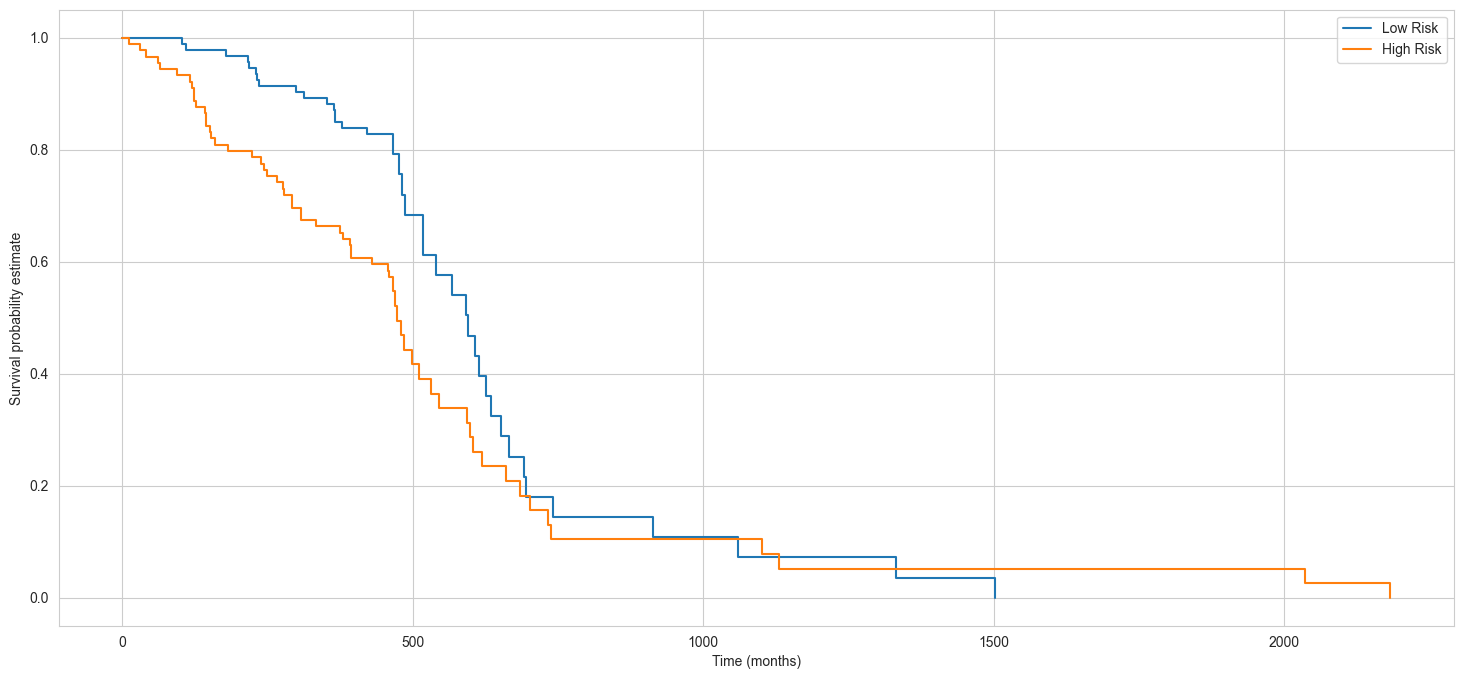

In [43]:
from lifelines import KaplanMeierFitter as KM
import random

S1 = mean_metylation_data[mean_metylation_data.risk_label == 1]
km1 = KM()
km1.fit(S1.loc[:, 'CLI_days_to_death'].fillna(random.randint(900,1825)), event_observed = S1.loc[:, 'CLI_vital_status'], label = 'Low Risk')

S2 = mean_metylation_data[mean_metylation_data.risk_label == 2]
km2 = KM()
km2.fit(S2.loc[:, "CLI_days_to_death"].fillna(random.randint(900,1825)), event_observed = S2.loc[:, 'CLI_vital_status'], label = 'High Risk')

ax = km1.plot(ci_show=False)
km2.plot(ax = ax, ci_show=False)
plt.xlabel('Time (months)')
plt.ylabel('Survival probability estimate')
plt.savefig('two_km_curves', dpi=300)

2024-01-17 21:35:03,038 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 21:35:03,071 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


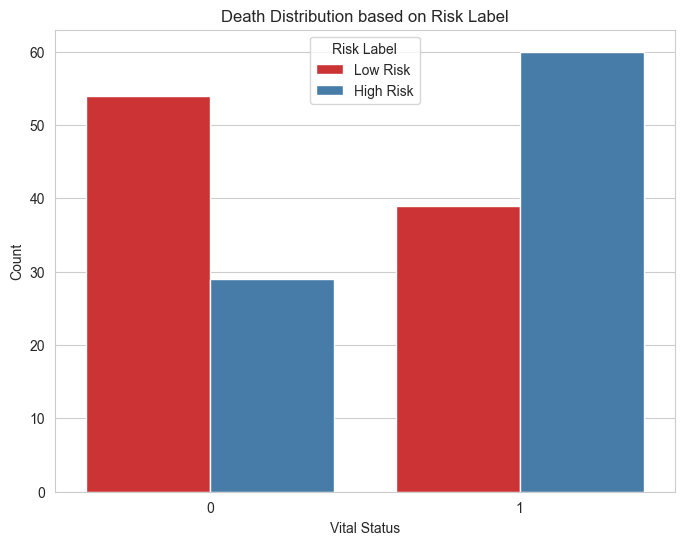

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='CLI_vital_status', hue='risk_label', data=mean_metylation_data, palette='Set1')
plt.title('Death Distribution based on Risk Label')
plt.xlabel('Vital Status')
plt.ylabel('Count')
plt.legend(title='Risk Label', labels=['Low Risk', 'High Risk'])
plt.show()